# Data Analytics Group Project - Predicting Happiness Score

In this notebook we try to train a model that will attempt to correctly predict Happinesss Score. We have a target feature (Happiness Score) and a whole range of descripitve features, some which came with the Happiness Score data file, others we had to collect ourselves. 



In [1]:
# Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# Plots appear in notebook
%matplotlib inline

#Turn on automcompletion
%config IPCompleter.greedy=True

## Part 1: Combining Data from different Data Sets
### Part A - Load main dataframe

The main bulk of the data stems directly from the world happiness report website at http://worldhappiness.report/". There we obtained a file containing the happiness scores from 2008-2017. It actually goes back to 2006 for some countries, however we decided to just focus on the laast 10 years. In addition it contains a couple of other features which we thought are very well suited as descriptive features. Some, where we were not quite sure on their meaning and quality we decided to drop and others were simply not of interest. 

For more detailed information on each descriptive feature, there is a pdf in the docs folder from the world happiness report,  which outlines exactly how these features were obtained. 

In [2]:
# Load in the csv from the happiness report website
main_df = pd.read_csv("raw_data/happiness&descriptivefeat_2008-2017.csv")
main_df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [3]:
# Rename target feature "life ladder" to "happiness Score"
main_df = main_df.rename(columns={'Life Ladder': 'Happiness Score'})

In [4]:
# Change Happiness Score into categorical feature (0-10)
main_df["Happiness Score"] = round(main_df["Happiness Score"])

In [5]:
# Drop unwanted columns and unnecessary columns
main_df.drop(['Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year'], axis=1, inplace=True )
main_df.head()

,country,year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
0,Afghanistan,2008,4.0,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084
1,Afghanistan,2009,4.0,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025
2,Afghanistan,2010,5.0,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176
3,Afghanistan,2011,4.0,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221
4,Afghanistan,2012,4.0,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078


### Part B - Add GDP (replacing log GDP)
There were a number of other datasets which we thought were interesting and maybe relevant in predicting happiness. One of them was crime rate. Unfortunately, the dataset only ranged back to 2012, and covered a different amount of countries in each year, and never the full amount of our main dataset which covers 162 countries starting from 2008-2017. So we decided to not add crime rate as it would simply add too much missing data

However, we did add some other features. One of them was raw GDP, which we used to replace the "Log GDP per capita". 

In [6]:
# read in GDP data
raw_gdp_df = pd.read_csv("raw_data/GDP2008_to_2017.csv")
raw_gdp_df.head()

,Country,Units,Scale,Country/Series-specific Notes,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Estimates Start After
0,Afghanistan,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",10.297,12.066,15.325,17.890,20.293,20.170,20.616,20.079,19.454,20.889,2016.0
1,Albania,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",12.901,12.093,11.938,12.896,12.323,12.784,13.246,11.338,11.865,13.181,2016.0
2,Algeria,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",171.001,137.054,161.207,200.251,209.016,209.755,213.810,165.874,159.049,178.287,2016.0
3,Angola,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",84.178,75.492,82.526,104.116,113.923,124.913,126.730,102.621,95.337,124.209,2015.0
4,Antigua and Barbuda,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",1.368,1.224,1.152,1.142,1.211,1.193,1.280,1.365,1.460,1.524,2016.0


In [7]:
raw_gdp_df.drop(["Units", "Scale", "Country/Series-specific Notes", "Estimates Start After"], axis=1, inplace=True)
raw_gdp_df.head()

,Country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,10.297,12.066,15.325,17.890,20.293,20.170,20.616,20.079,19.454,20.889
1,Albania,12.901,12.093,11.938,12.896,12.323,12.784,13.246,11.338,11.865,13.181
2,Algeria,171.001,137.054,161.207,200.251,209.016,209.755,213.810,165.874,159.049,178.287
3,Angola,84.178,75.492,82.526,104.116,113.923,124.913,126.730,102.621,95.337,124.209
4,Antigua and Barbuda,1.368,1.224,1.152,1.142,1.211,1.193,1.280,1.365,1.460,1.524


In [8]:
# Check for duplicated rows
print("Number of duplicated rows: {}".format(sum(raw_gdp_df.duplicated())))

Number of duplicated rows: 0


In [9]:
# Conver raw_gdp_df into one more suitable for merging
raw_gdp_df = raw_gdp_df.rename(columns={"Country": "country"})
raw_gdp_df = pd.melt(raw_gdp_df, id_vars=["country"], var_name="year", value_name="GDP").sort_values(["country", "year"])
raw_gdp_df.head()

,country,year,GDP
0,Afghanistan,2008,10.297
195,Afghanistan,2009,12.066
390,Afghanistan,2010,15.325
585,Afghanistan,2011,17.890
780,Afghanistan,2012,20.293


In [10]:
# conver dataype of Year to int64
raw_gdp_df.year = raw_gdp_df.year.astype("int64", inplace=True)

In [11]:
# merge with the main df based on year and country
main_df = pd.merge(main_df, raw_gdp_df,  how='left', left_on=['country', "year"], right_on = ['country', "year"])
main_df.drop(["Log GDP per capita"], axis=1, inplace=True)
main_df.head()

,country,year,Happiness Score,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GDP
0,Afghanistan,2008,4.0,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,10.297
1,Afghanistan,2009,4.0,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,12.066
2,Afghanistan,2010,5.0,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,15.325
3,Afghanistan,2011,4.0,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,17.890
4,Afghanistan,2012,4.0,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,20.293


### Part C - Add life expectancy from WHO
Next we added additional life expectancy data from WHO besides the already existing "Healthy life expectancy at birth" feature

In [12]:
# read in WHO data
who_df = pd.read_csv("raw_data/WHOLifeExpectancy.csv")

# select desired columns
who_df = who_df[["Unnamed: 0", "Unnamed: 1", "Life expectancy at birth (years)", "Life expectancy at age 60 (years)"]]

# rename columns
who_df = who_df.rename(columns={"Unnamed: 0": "country", "Unnamed: 1": "year", "Life expectancy at birth (years)": "Life expectancy birth", "Life expectancy at age 60 (years)": "Life expectancy age 60"})

# drop first row (contains useless data)
who_df.drop(who_df.index[0], inplace=True)

# change dtypes
who_df.year = who_df.year.astype("int64", inplace=True)
who_df["Life expectancy birth"] = who_df["Life expectancy birth"].astype(float, inplace=True)
who_df["Life expectancy age 60"] = who_df["Life expectancy age 60"].astype(float, inplace=True)

who_df.head()

,country,year,Life expectancy birth,Life expectancy age 60
1,Afghanistan,2015,60.5,16.0
2,Afghanistan,2014,59.9,15.9
3,Afghanistan,2013,59.9,15.9
4,Afghanistan,2012,59.5,15.8
5,Afghanistan,2011,59.2,15.8


In [13]:
# merge with the main df based on year and country
main_df = pd.merge(main_df, who_df,  how='left', left_on=['country', "year"], right_on = ['country', "year"])
main_df.head()

,country,year,Happiness Score,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GDP,Life expectancy birth,Life expectancy age 60
0,Afghanistan,2008,4.0,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,10.297,58.1,15.6
1,Afghanistan,2009,4.0,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,12.066,58.6,15.7
2,Afghanistan,2010,5.0,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,15.325,58.8,15.7
3,Afghanistan,2011,4.0,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,17.890,59.2,15.8
4,Afghanistan,2012,4.0,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,20.293,59.5,15.8


### Part D - Add Infant Mortality Rate

In [14]:
# read in infant mortality data
im_df = pd.read_csv("raw_data/Dying_baby_data.csv")

# rename columns
im_df = im_df.rename(columns={"Country": "country", "Year": "year", "Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)": "Infant mortality rate", "Neonatal mortality rate (per 1000 live births)": "Neonatal mortality rate", "Under-five mortality rate (probability of dying by age 5 per 1000 live births)": "Under-five mortality rate"})

im_df.head()

,country,year,Infant mortality rate,Neonatal mortality rate,Under-five mortality rate
0,Afghanistan,2016,53.2 [44.0-62.2],40.0 [31.6-48.9],70.4 [56.6-84.7]
1,Afghanistan,2015,54.9 [46.5-63.1],41.1 [33.4-49.2],73.2 [60.2-86.1]
2,Afghanistan,2014,56.8 [49.0-64.4],42.4 [35.2-49.9],76.1 [64.0-88.1]
3,Afghanistan,2013,58.8 [51.7-66.1],43.7 [37.1-50.6],79.3 [68.2-90.7]
4,Afghanistan,2012,61.0 [54.6-67.8],45.1 [39.0-51.4],82.8 [72.7-93.4]


In [15]:
# only keep percentage of mortality rate
im_df[['Infant mortality rate', 'Neonatal mortality rate', 'Under-five mortality rate']] = im_df[[
    'Infant mortality rate', 'Neonatal mortality rate', 'Under-five mortality rate']].apply(lambda row: row.str.replace("(\[.+\])", ''))
im_df.head()

,country,year,Infant mortality rate,Neonatal mortality rate,Under-five mortality rate
0,Afghanistan,2016,53.2,40.0,70.4
1,Afghanistan,2015,54.9,41.1,73.2
2,Afghanistan,2014,56.8,42.4,76.1
3,Afghanistan,2013,58.8,43.7,79.3
4,Afghanistan,2012,61.0,45.1,82.8


In [16]:
# merge with the main df based on year and country
main_df = pd.merge(main_df, im_df,  how='left', left_on=['country', "year"], right_on = ['country', "year"])
main_df.head()

,country,year,Happiness Score,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GDP,Life expectancy birth,Life expectancy age 60,Infant mortality rate,Neonatal mortality rate,Under-five mortality rate
0,Afghanistan,2008,4.0,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,10.297,58.1,15.6,70.8,50.9,98.2
1,Afghanistan,2009,4.0,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,12.066,58.6,15.7,68.2,49.4,94.1
2,Afghanistan,2010,5.0,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,15.325,58.8,15.7,65.7,48.0,90.2
3,Afghanistan,2011,4.0,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,17.890,59.2,15.8,63.3,46.5,86.4
4,Afghanistan,2012,4.0,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,20.293,59.5,15.8,61.0,45.1,82.8


### Part E - Add CPI (world corruption ranking)

In [17]:
# read in CPI mortality data
cpi_df = pd.read_csv("raw_data/transparency_international_CPI.csv")

# drop unwanted columns
cpi_df.drop(["ISO3"], axis=1, inplace=True)

# rename columns
cpi_df = cpi_df.rename(columns={"Country": "country", "CPI score 2017": "2017", "CPI score 2016": "2016", "CPI score 2015": "2015", "CPI score 2014": "2014", "CPI Score 2013": "2013", "CPI Score 2012": "2012"})

# convert into a format suitable for merging
cpi_df = pd.melt(cpi_df, id_vars=["country"], var_name="year", value_name="CPI").sort_values(["country", "year"])

# conver dataype of Year to int64
cpi_df.year = cpi_df.year.astype("int64", inplace=True)
cpi_df.head()                       

,country,year,CPI
1081,Afghanistan,2012,8.0
900,Afghanistan,2013,8.0
719,Afghanistan,2014,12.0
538,Afghanistan,2015,11.0
357,Afghanistan,2016,15.0


In [18]:
# merge with the main df based on year and country
main_df = pd.merge(main_df, cpi_df,  how='left', left_on=['country', "year"], right_on = ['country', "year"])
main_df.head()

,country,year,Happiness Score,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GDP,Life expectancy birth,Life expectancy age 60,Infant mortality rate,Neonatal mortality rate,Under-five mortality rate,CPI
0,Afghanistan,2008,4.0,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,10.297,58.1,15.6,70.8,50.9,98.2,NaN
1,Afghanistan,2009,4.0,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,12.066,58.6,15.7,68.2,49.4,94.1,NaN
2,Afghanistan,2010,5.0,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,15.325,58.8,15.7,65.7,48.0,90.2,NaN
3,Afghanistan,2011,4.0,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,17.890,59.2,15.8,63.3,46.5,86.4,NaN
4,Afghanistan,2012,4.0,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,20.293,59.5,15.8,61.0,45.1,82.8,8.0


### Part F - Write merged file to csv

In [19]:
main_df.to_csv("processed_data/merged_happiness_data.csv", index=False)

## Part 2: Data Quality Report
### Part A - Overview & Analysis

In [20]:
# load in the merged data
df = pd.read_csv("processed_data/merged_happiness_data.csv")
df.head()

,country,year,Happiness Score,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GDP,Life expectancy birth,Life expectancy age 60,Infant mortality rate,Neonatal mortality rate,Under-five mortality rate,CPI
0,Afghanistan,2008,4.0,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,10.297,58.1,15.6,70.8,50.9,98.2,NaN
1,Afghanistan,2009,4.0,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,12.066,58.6,15.7,68.2,49.4,94.1,NaN
2,Afghanistan,2010,5.0,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,15.325,58.8,15.7,65.7,48.0,90.2,NaN
3,Afghanistan,2011,4.0,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,17.890,59.2,15.8,63.3,46.5,86.4,NaN
4,Afghanistan,2012,4.0,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,20.293,59.5,15.8,61.0,45.1,82.8,8.0


#### Target Feature:
The target feature is of course Happiness Score which is the National average response to the question “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?”

#### Descriptive Features
The descriptive features are as follows:
1. **country** 
2. **year**
3. **Social support** - The national average of the binary responses (either 0 or 1) to the question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
4. **Healthy life expectancy at birth** - Life expectancy spent in “Good Health”. So not just Life Expectancy. Naturally Smaller than LE. 
5. **Freedom to make life choices** - The national average of responses to the question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
6. **Generosity** - The residual of regressing national average of response to the question “Have you donated money to a charity in the past month?” on GDP per capita.
7. **Perceptions of corruption** - The measure is the national average of the survey responses to two questions: (I) “Is corruption widespread throughout the government or not” and (II) “Is corruption widespread within businesses or not?”
8. **Positive affect** - The average of three positive affect measures: happiness, laugh and enjoyment. These measures are computed from responses to question such as “Did you smile or laugh a lot yesterday?”.
9. **Negative affect** - Defined as the average of three negative affect measures. They are worry, sadness and anger, respectively. These measures are computed from responses to question such as “Did you feel sad a lot yesterday?”.
10. **Confidence in national government** - Answer to “Do you have confidence in each of the following, or not? How about the national government?”
11. **Democratic Quality & Delivery Quality**: both are based on Worldwide Governance Indicators (WGI) project. The original data has six dimensions: Voice and Accountability, Political Stability and Absence of Violence, GovernmentEffectiveness, Regulatory Quality, Rule of Law, Control of Corruption which are reduced to two here.
12. **GDP**
13. **Life expectancy birth**
14. **Life expectancy age 60**
15. **Infant mortality rate**
16. **Neonatal mortality rate**
17. **Under-five mortality rate**
18 **CPI**


In [21]:
# Check for duplicated rows
print("Number of duplicated rows: {}".format(sum(main_df.duplicated())))

Number of duplicated rows: 0


In [22]:
# Check dtypes
df.dtypes

country                               object
year                                   int64
Happiness Score                      float64
Social support                       float64
Healthy life expectancy at birth     float64
Freedom to make life choices         float64
Generosity                           float64
Perceptions of corruption            float64
Positive affect                      float64
Negative affect                      float64
Confidence in national government    float64
Democratic Quality                   float64
Delivery Quality                     float64
GDP                                  float64
Life expectancy birth                float64
Life expectancy age 60               float64
Infant mortality rate                float64
Neonatal mortality rate              float64
Under-five mortality rate            float64
CPI                                  float64
dtype: object

In [23]:
# Convert country and Happiness Score to categorical
df["country"] = df["country"].astype("category")
df["Happiness Score"] = df["Happiness Score"].astype("category")
df["year"] = df["year"].astype(int)

In [24]:
# Check number of countries
print("Number of countries in dataset: {}".format(len(main_df.country.unique())))

Number of countries in dataset: 164


Text(0,0.5,'Number of Countries')

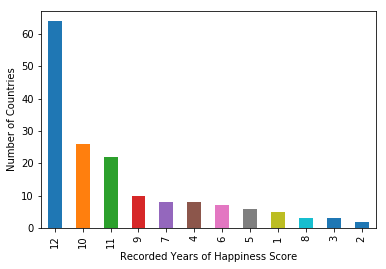

In [25]:
# Show for how many countries the happiness score is available in what time span
ax = df.country.value_counts().value_counts().plot(kind="bar")
ax.set_xlabel("Recorded Years of Happiness Score")
ax.set_ylabel("Number of Countries")

As we can see there are 64 countries for which we have a happiness score 12 years back. We are however only interested in the first 10 years, so we drop anything that is before 2008. Other countries have less data available but we thought this was no problem.

In [26]:
# drop years 2006 and 2007
df = df.drop(df[df.year < 2008].index)

Text(0,0.5,'Number of Countries')

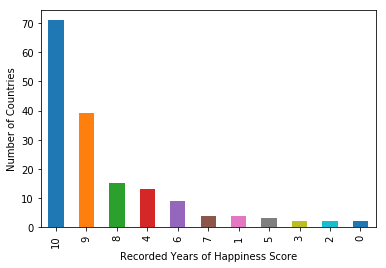

In [27]:
# Show for how many countries the happiness score is available in what time span
ax = df.country.value_counts().value_counts().plot(kind="bar")
ax.set_xlabel("Recorded Years of Happiness Score")
ax.set_ylabel("Number of Countries")

### Part B - Data Quality Report
#### Continous Data

In [28]:
#Get descriptive stats for continous data
con_feat = df.describe(exclude=["category"]).T

#Create a DF containing only continous data
con_df = df.select_dtypes(include=[np.number])
con_df.index = df.index

#Add Median
con_feat["median"] = con_df.median()

#Add Cardinality
con_feat["card"] = con_df.apply(pd.Series.nunique)

#Add percentage missing by checking for missing data in each column. 
#NOTE: This only considers NA values as missing. Data could still be absent
#      but replaced with a "dummy" entry such as a blank space or a zero.
#      This issue Will be adressed in the Data Quality plan.
con_feat["missPerc"] = con_df.isna().apply(pd.Series.sum)/df.shape[0]

In [29]:
#Prettify the result, rearrange columns and get rid of the 50th percentile column (same as median).
con_feat = con_feat[["count", "missPerc", "card", "min", "25%", "mean", "median", "75%", "max", "std"]]
print("Descriptive statistics for continous features:\n")
#Rounding will not get saved. Is only done so that an overview of the df is easier to read.
display(con_feat.round(2))

#Save it in its own csv file
con_feat.to_csv("continous_feature_quality_table.csv")

Descriptive statistics for continous features:



,count,missPerc,card,min,25%,mean,median,75%,max,std
year,1344.0,0.00,10,2008.00,2010.00,2012.71,2013.00,2015.00,2017.00,2.80
Social support,1333.0,0.01,1333,0.29,0.74,0.81,0.83,0.90,0.99,0.12
Healthy life expectancy at birth,1335.0,0.01,1283,39.35,57.30,62.48,64.04,68.26,76.54,7.82
Freedom to make life choices,1321.0,0.02,1320,0.26,0.63,0.73,0.75,0.85,0.99,0.15
Generosity,1298.0,0.03,1298,-0.32,-0.12,-0.00,-0.02,0.09,0.68,0.16
Perceptions of corruption,1266.0,0.06,1266,0.04,0.69,0.75,0.81,0.88,0.98,0.19
Positive affect,1328.0,0.01,1328,0.36,0.62,0.71,0.72,0.80,0.94,0.11
Negative affect,1334.0,0.01,1334,0.08,0.20,0.26,0.25,0.31,0.70,0.09
Confidence in national government,1191.0,0.11,1191,0.08,0.33,0.48,0.46,0.61,0.99,0.19
Democratic Quality,1176.0,0.12,1176,-2.45,-0.79,-0.14,-0.24,0.65,1.54,0.88


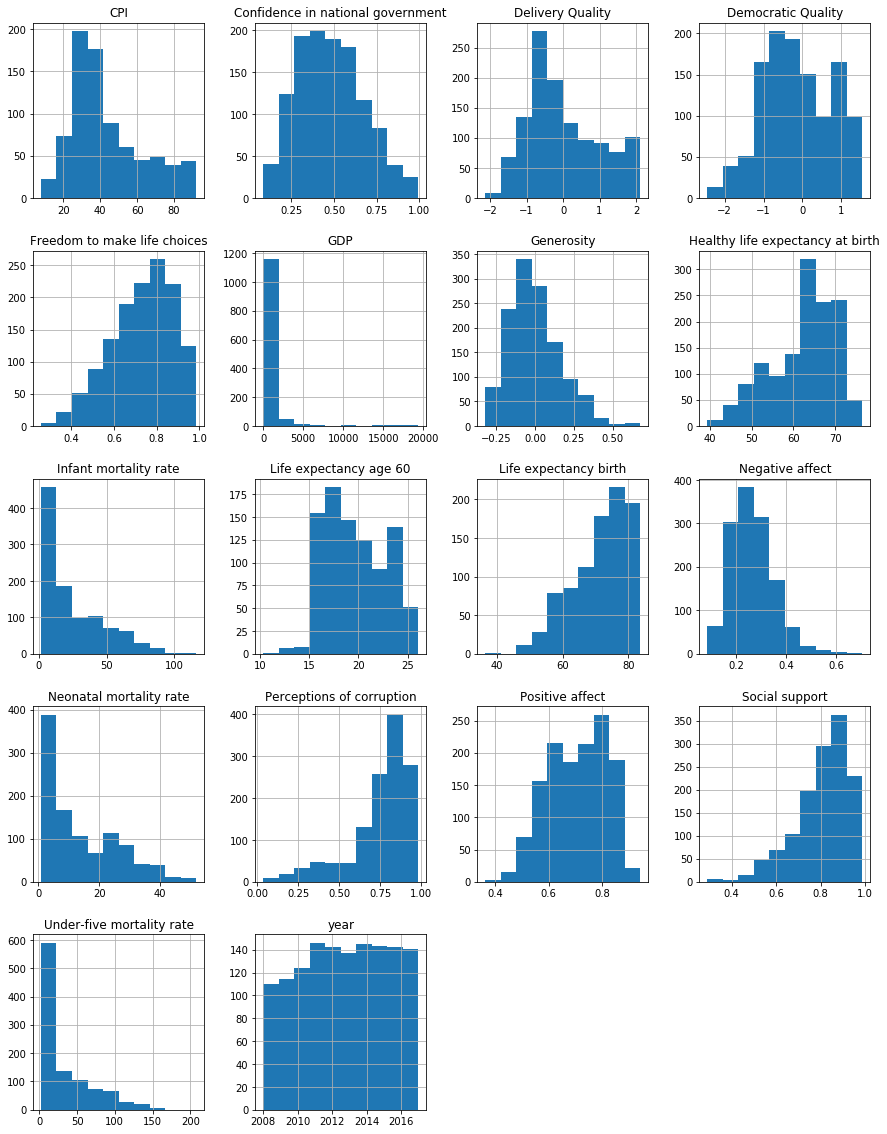

In [30]:
#Plot histogram for continous features
df.hist(figsize=(15,20))

#Show the plot and then proceed to clear the current figure to reuse for other plots
plt.show()
plt.clf()

#### Categorical Data

In [31]:
#Get descriptive stats for continous data
cat_feat = df.describe(include=["category"]).T

#rename some coulmns for improved understanding
cat_feat.rename(index=str, columns={"unique":"card", "top":"mode", "freq":"modeFreq"}, inplace=True)

#Create a DF containing only categorical data
cat_df = df.select_dtypes(include=["category"])
cat_df.index = df.index

#Add percentage missing by checking for missing data in each column. 
#NOTE: This only considers NA values as missing. Data could still be absent
#      but replaced with a "dummy" entry such as a blank space or a zero.
#      This issue Will be adressed in the Data Quality plan.
missing = cat_df.isna().apply(pd.Series.sum)
print("Missing count for each categorical feature:\n")
print(missing)
cat_feat["missPerc"] = missing/1000 * 100

Missing count for each categorical feature:

country            0
Happiness Score    0
dtype: int64


In [32]:
#Add mode percentage 
cat_feat["modePerc"] = cat_feat.modeFreq/1000 * 100

#Add 2n mode category, frequency and percentage
#First get the 2n mode value for each column and its count
sec_mode = []
sec_mode_count = []
for col in cat_df:
    cat_df[col].cat.categories
    sec_mode.append(cat_df[col].value_counts().index[1])
    sec_mode_count.append(cat_df[col].value_counts().iloc[1])

#Add to df
cat_feat["secMode"] = sec_mode
cat_feat["secModeFreq"] = sec_mode_count
cat_feat["secModePerc"] = cat_feat.secModeFreq/1000 * 100

#Prettify the result, rearrange columns etc.
cat_feat = cat_feat[["count", "missPerc", "card", "mode", "modeFreq", "modePerc", "secMode", "secModeFreq", "secModePerc" ]]
print("Descriptive statistics for categorical features:")
display(cat_feat)

#Save it in its own csv file
cat_feat.to_csv("categorical_feature_quality_table.csv")

Descriptive statistics for categorical features:


,count,missPerc,card,mode,modeFreq,modePerc,secMode,secModeFreq,secModePerc
country,1344,0.0,162,Zimbabwe,10,1,Kosovo,10,1.0
Happiness Score,1344,0.0,6,5,435,43.5,6,342,34.2


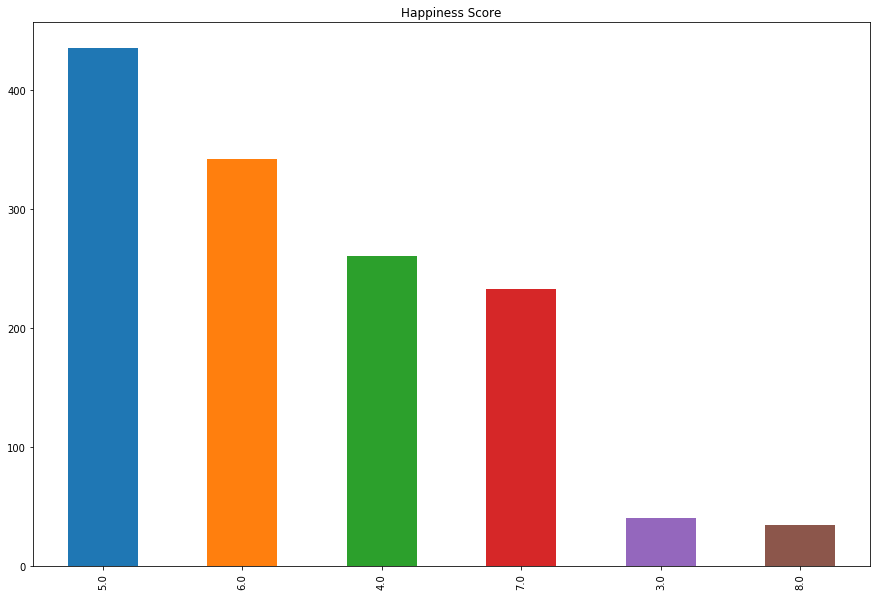

In [33]:
#plot happiness
fig = cat_df["Happiness Score"].value_counts().plot(kind="bar", title=col, figsize=(15, 10))
plt.show()
    
#Close pdf and clear figure
plt.clf()

### Part C - Data Quality Plan
The categorical data seems fine. We have no missing values in any row and the cardinality seems appropriate for both features. There seems to be more work for the continous data as we have a substantial amount of missing data. Before that though a quick look at the other issues. GDP seemed to have a very low minimum and very high maximum. So I investigate it next.

In [34]:
# Min GDP Country
df[df.GDP == min(df.GDP)]

,country,year,Happiness Score,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GDP,Life expectancy birth,Life expectancy age 60,Infant mortality rate,Neonatal mortality rate,Under-five mortality rate,CPI
301,Comoros,2009,3.0,0.629427,52.538597,0.507845,-0.024591,0.838116,0.671982,0.167317,0.318495,-0.554365,-1.319321,0.537,61.3,16.0,66.1,38.2,90.8,NaN


In [35]:
# Max GDP country
df[df.GDP == max(df.GDP)]

,country,year,Happiness Score,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GDP,Life expectancy birth,Life expectancy age 60,Infant mortality rate,Neonatal mortality rate,Under-five mortality rate,CPI
1482,United States,2017,7.0,0.921003,69.77092,0.868497,0.181657,0.681191,0.826555,0.268269,0.386535,NaN,NaN,19390.6,NaN,NaN,NaN,NaN,NaN,NaN


The values for GDP seem to be fine after seeing that the lowest one belongs to a very small country and the highest one to USA. Next I will investigate any missing data. There are several columns for which only a tiny fraction is missing such as Social support shown below. So for these cases I just replace each missing value with the countries average value for that column

In [36]:
df[df["Social support"].isnull()]

,country,year,Happiness Score,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GDP,Life expectancy birth,Life expectancy age 60,Infant mortality rate,Neonatal mortality rate,Under-five mortality rate,CPI
20,Algeria,2010,5.0,NaN,64.298981,0.592696,-0.232023,0.618038,NaN,NaN,NaN,-1.140853,-0.740093,161.207,74.7,21.4,23.5,16.8,27.3,NaN
92,Bahrain,2014,6.0,NaN,65.764687,NaN,NaN,NaN,NaN,NaN,NaN,-1.109269,0.491516,33.388,76.8,19.6,6.7,3.1,7.8,49.0
378,Djibouti,2010,5.0,NaN,51.460163,0.763730,-0.067456,0.596910,NaN,NaN,0.692278,-0.506095,-0.683048,1.099,61.3,17.3,62.5,37.1,76.5,NaN
744,Kuwait,2014,6.0,NaN,65.056374,NaN,NaN,NaN,NaN,NaN,NaN,-0.254227,-0.127896,162.695,74.6,17.8,7.8,4.8,9.1,44.0
941,Morocco,2010,4.0,NaN,63.526836,0.662900,-0.174080,0.900453,NaN,NaN,NaN,-0.540801,-0.140432,93.217,72.8,18.8,28.8,21.4,33.5,NaN
1043,Oman,2011,7.0,NaN,66.183914,0.916293,-0.015441,NaN,NaN,0.295164,NaN,-0.314025,0.295601,67.937,75.8,20.3,9.9,5.5,11.5,NaN
1137,Qatar,2010,7.0,NaN,66.829788,NaN,0.060170,NaN,NaN,NaN,NaN,0.070845,0.925530,125.122,77.3,20.6,7.7,4.6,9.0,NaN
1140,Qatar,2015,6.0,NaN,67.537521,NaN,NaN,NaN,NaN,NaN,NaN,-0.074040,0.823927,164.641,78.2,21.3,7.4,4.2,8.6,71.0
1396,Tunisia,2009,5.0,NaN,64.893021,0.781496,-0.133612,0.722211,NaN,NaN,NaN,-0.648282,0.071959,43.624,74.7,19.4,15.7,11.0,18.3,NaN
1455,United Arab Emirates,2014,7.0,NaN,68.171936,NaN,NaN,NaN,NaN,NaN,NaN,-0.146230,1.070845,403.198,76.9,20.0,6.8,4.1,7.9,70.0


In [37]:
# Define a helper function which gets the average for a selected country's column values
def get_average(Country, col):
    '''Gets the average of a country's column values
    '''
    average = df[df.country==Country][col].mean()
    return average

In [38]:
# Replace the missing values for "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect", "Confidence in national government", "Democratic Quality", "Delivery Quality", "GDP"
for col in ["Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect", "Confidence in national government", "Democratic Quality", "Delivery Quality", "GDP"]:
    Countries = df[df[col].isnull()].country
    Years =  df[df[col].isnull()].year
    for Country, Year in zip(Countries, Years):
        df.at[(df.country==Country) & (df.year==Year), col] =  get_average(Country, col)

Unfortunately this does not work for all of the selected columns. Some countires have no value at all for a certain feature, so naturally there is no average value that can be used to replace the missing value. One could replace the missing value by the worldwide average which is what I will do

In [39]:
for col in ["Healthy life expectancy at birth", "Generosity", "Perceptions of corruption", "Confidence in national government", "Democratic Quality", "Delivery Quality", "GDP"]:
    Countries = df[df[col].isnull()].country
    Years =  df[df[col].isnull()].year
    for Country, Year in zip(Countries, Years):
        df.at[(df.country==Country) & (df.year==Year), col] =  df[col].mean()

There are however a couple of features for which more data is missing, although there is an observale trend to the amount that is missing. This depends on the dataset where the features came from. Data from the WHO has 33% missing, Infant mortality has 23% missing and CPI has 41% missing. Looking for trends in the missing data:

In [40]:
df[df["Life expectancy birth"].isnull()].year.value_counts()

2016    142
2017    141
2012     22
2011     21
2015     20
2014     20
2013     20
2010     17
2009     17
2008     17
Name: year, dtype: int64

In [41]:
df[df["Life expectancy age 60"].isnull()].year.value_counts()

2016    142
2017    141
2012     22
2011     21
2015     20
2014     20
2013     20
2010     17
2009     17
2008     17
Name: year, dtype: int64

In [42]:
# same for the other two values that came with the infant mortality data set
df[df["Infant mortality rate"].isnull()].year.value_counts()

2017    141
2012     22
2011     21
2016     20
2015     20
2014     20
2013     20
2010     17
2009     17
2008     17
Name: year, dtype: int64

In [43]:
df[df["CPI"].isnull()].year.value_counts()

2011    146
2010    124
2009    114
2008    110
2014     10
2016      9
2012      9
2017      8
2015      8
2013      8
Name: year, dtype: int64

Data seems to be missing mostly for the years 2016 and 2017. This makes sense as these are very recent and therefore not much was published on it. However since it is under 30% for all except CPI, I replace it with the countrys average, and if that does not exist then with the worldwide average. Hover CPI will be dropped as we do not have enough data considering it only ranges back to 2012. This is unfortunate, and if one wanted to include it in the dataset one would have to focus on only 2012-2017. Replacing five years worth of data with an average seems unrealistic to me. For one or two years I imagine that the average is a good approximation but for CPI there is just too much missing

In [44]:
# Replace the missing values for "Life expectancy birth", "Life expectancy age 60", "Infant mortality rate", "Neonatal mortality rate", "Under-five mortality rate"
for col in ["Life expectancy birth", "Life expectancy age 60", "Infant mortality rate", "Neonatal mortality rate", "Under-five mortality rate"]:
    Countries = df[df[col].isnull()].country
    Years =  df[df[col].isnull()].year
    for Country, Year in zip(Countries, Years):
        df.at[(df.country==Country) & (df.year==Year), col] =  get_average(Country, col)

In [45]:
# Replace by worldwide average evrything for which there was no national average
for col in ["Life expectancy birth", "Life expectancy age 60", "Infant mortality rate", "Neonatal mortality rate", "Under-five mortality rate"]:
    Countries = df[df[col].isnull()].country
    Years =  df[df[col].isnull()].year
    for Country, Year in zip(Countries, Years):
        df.at[(df.country==Country) & (df.year==Year), col] =  df[col].mean()

In [46]:
# drop CPI
df.drop(["CPI"], axis=1, inplace=True)

In [47]:
# write cleaned df to csv
df.to_csv("processed_data/cleaned_merged_happiness_data.csv", index=False)